In [1]:
#Example inspired to Quantopian Lecture Series: Pairs Trading Exercises
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

# just set the seed for the random number generator
np.random.seed(107)

In [9]:
A_returns = np.random.normal(0, 1, 100)
A = pd.Series(np.cumsum(A_returns), name='X') + 50

some_noise = np.random.exponential(1, 100)
 
B = A - 7 + some_noise

A and B are cointegrated
2.1414166065997273e-05


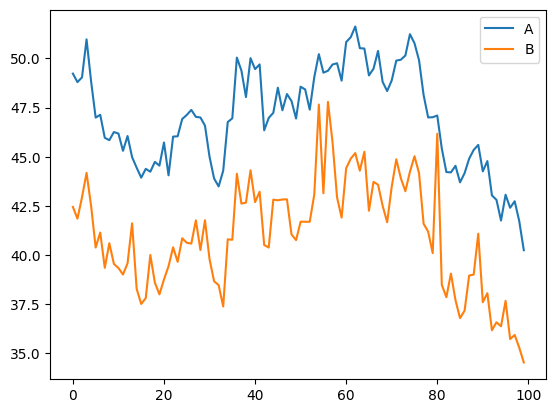

In [10]:
score, pvalue, _ = coint(A,B)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("A and B are cointegrated")
    print(pvalue)
else:
    print ("A and B are not cointegrated")
    print(pvalue)
    
A.name = "A"
B.name = "B"
pd.concat([A, B], axis=1).plot();

In [11]:
C_returns = np.random.normal(0.01, 1, 100) 
C = pd.Series(np.cumsum(C_returns), name='X') + 100

D_returns = np.random.normal(0.02, 1, 100)
D = pd.Series(np.cumsum(D_returns), name='X') + 100



C and D are not cointegrated
0.6515384709118857


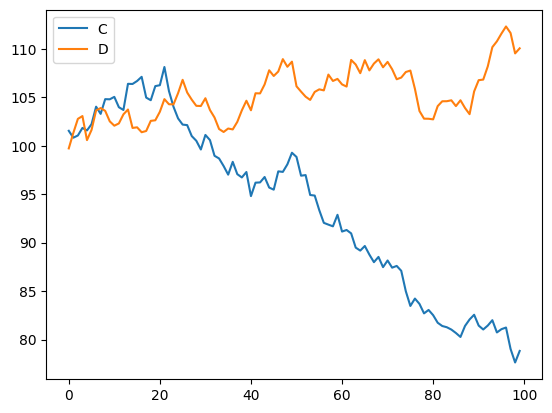

In [12]:
score, pvalue, _ = coint(C,D)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("C and D are cointegrated")
    print(pvalue)
else:
    print ("C and D are not cointegrated")
    print(pvalue)

C.name = "C"
D.name = "D"
pd.concat([C, D], axis=1).plot();

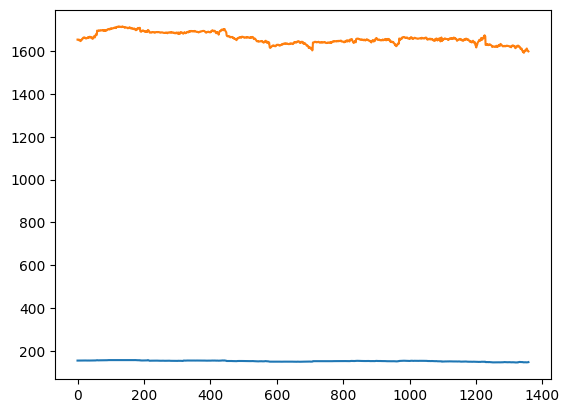

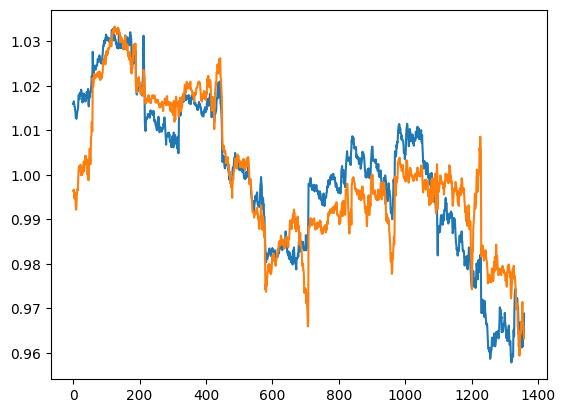

In [13]:
df_aapl = pd.read_excel('aapl.xlsx')
df_amzn = pd.read_excel('amzn.xlsx')

close_aapl = df_aapl['Close']
close_amzn = df_amzn['Close']


plt.plot(close_aapl)
plt.plot(close_amzn)
plt.show()

plt.plot(close_aapl/close_aapl.mean())
plt.plot(close_amzn/close_amzn.mean())
plt.show()



In [14]:
score, pvalue, _ = coint(close_aapl,close_amzn)
confidence_level = 0.05

if pvalue < confidence_level:
    print ("AAPL and AMZN prices are cointegrated")
    print(pvalue)
else:
    print ("AAPL and AMZN prices are not cointegrated")
    print(pvalue)

AAPL and AMZN prices are cointegrated
0.03298732107786901


In [15]:
r_aapl = close_aapl[1:] / close_aapl[:-1].values - 1
r_amzn = close_amzn[1:] / close_amzn[:-1].values - 1


score, pvalue, _ = coint(r_aapl,r_amzn)
confidence_level = 0.05

if pvalue < confidence_level:
    print ("AAPL and AMZN returns are cointegrated")
    print(pvalue)
else:
    print ("AAPL and AMZN returns are not cointegrated")
    print(pvalue)

AAPL and AMZN returns are cointegrated
2.071103098470908e-29
